<a href="https://colab.research.google.com/github/Blackan06/Blackan06/blob/main/WQI_PREDICT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [64]:
url = '/content/CombineArea.xlsx'
df = pd.read_excel(url, header=0, index_col=0, parse_dates=True)

<ipython-input-64-2b2f7920713f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_excel(url, header=0, index_col=0, parse_dates=True)


In [68]:
df['pH_score'] = (df['PH'] - df['PH'].min()) / (df['PH'].max() - df['PH'].min()) * 100
df['DO_score'] = (df['DO'] - df['DO'].min()) / (df['DO'].max() - df['DO'].min()) * 100
df['Temperature_score'] = (df['Temperature'] - df['Temperature'].min()) / (df['Temperature'].max() - df['Temperature'].min()) * 100

# Tính WQI trung bình từ các yếu tố pH, DO và Temperature
df['WQI'] = ((df['pH_score'] + df['DO_score'] + df['Temperature_score']) / 3).round(2)

# Kiểm tra kết quả
print(df[['PH', 'DO', 'Temperature', 'WQI']].head())

      PH    DO  Temperature    WQI
NO                                
1   5.78  6.05         29.0  63.17
2   6.61  6.95         28.0  69.14
3   7.19  5.87         26.5  61.26
4   6.98  5.87         27.0  61.82
5   7.02  5.88         28.0  65.46


In [69]:
df.dtypes

,0
Area,object
Date,datetime64[ns]
Temperature,float64
PH,float64
DO,float64
pH_score,float64
DO_score,float64
Temperature_score,float64
WQI,float64


In [70]:
df.head()

,Area,Date,Temperature,PH,DO,pH_score,DO_score,Temperature_score,WQI
NO,,,,,,,,,
1,My Thuan,2003-01-15,29.0,5.78,6.05,61.783439,68.144499,59.595960,63.17
2,My Thuan,2003-02-15,28.0,6.61,6.95,75.000000,82.922824,49.494949,69.14
3,My Thuan,2003-03-15,26.5,7.19,5.87,84.235669,65.188834,34.343434,61.26
4,My Thuan,2003-04-15,27.0,6.98,5.87,80.891720,65.188834,39.393939,61.82
5,My Thuan,2003-05-15,28.0,7.02,5.88,81.528662,65.353038,49.494949,65.46


In [71]:
df.columns

Index(['Area', 'Date', 'Temperature', 'PH', 'DO', 'pH_score', 'DO_score',
       'Temperature_score', 'WQI'],
      dtype='object')

In [72]:
df['Date']

,Date
NO,
1,2003-01-15
2,2003-02-15
3,2003-03-15
4,2003-04-15
5,2003-05-15
...,...
744,2023-08-15
745,2023-09-15
746,2023-10-15


#Visualize the data


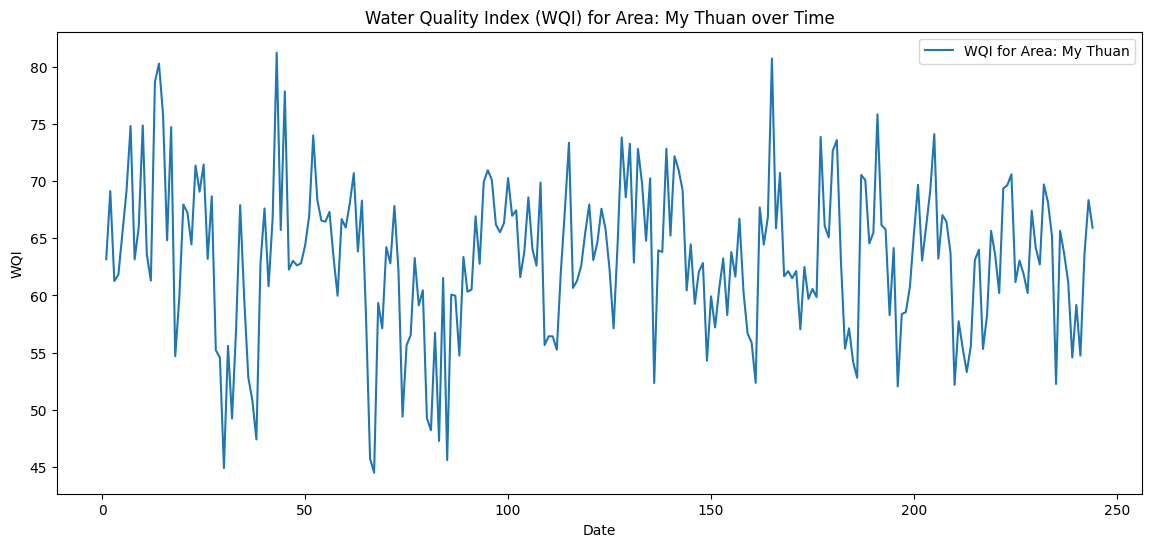

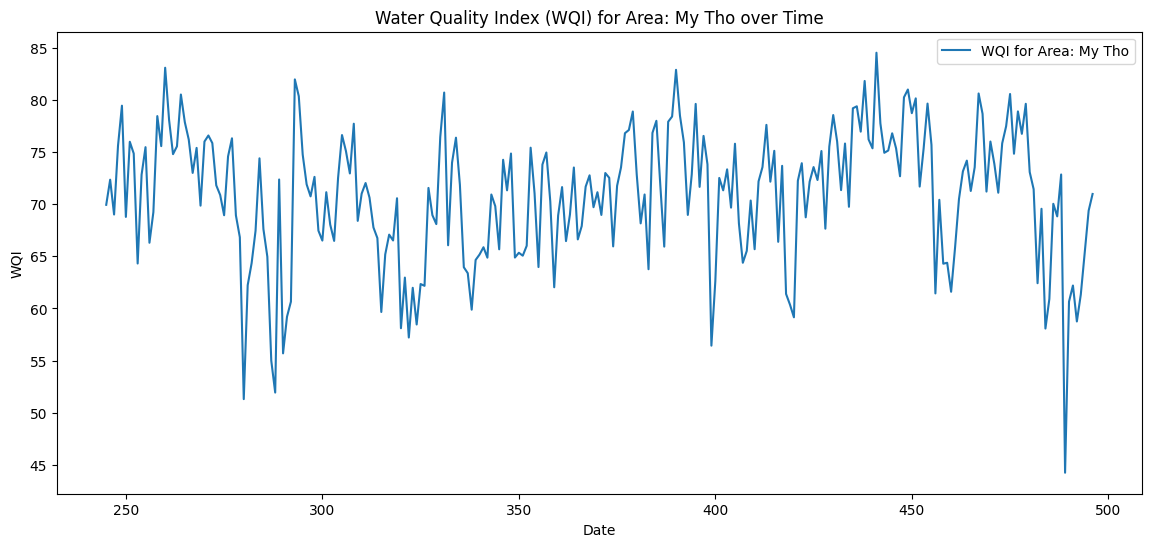

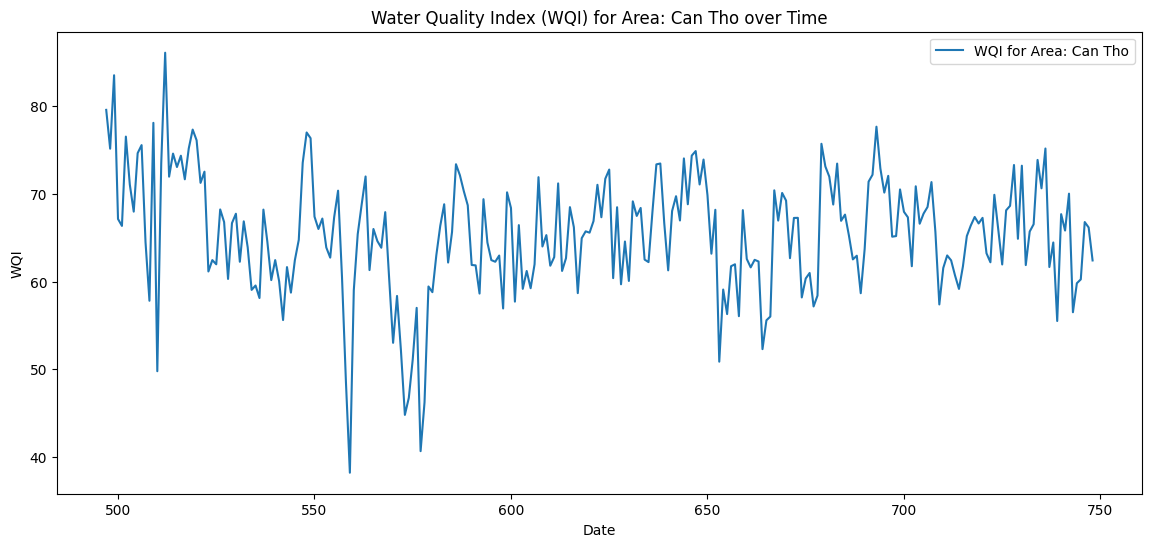

In [75]:
areas = df['Area'].unique()

# Lặp qua từng khu vực và vẽ line plot cho WQI
for area in areas:
    area_data = df[df['Area'] == area]

    plt.figure(figsize=(14, 6))
    plt.plot(area_data.index, area_data['WQI'], label=f'WQI for Area: {area}')
    plt.xlabel('Date')
    plt.ylabel('WQI')
    plt.title(f'Water Quality Index (WQI) for Area: {area} over Time')
    plt.legend()
    plt.show()

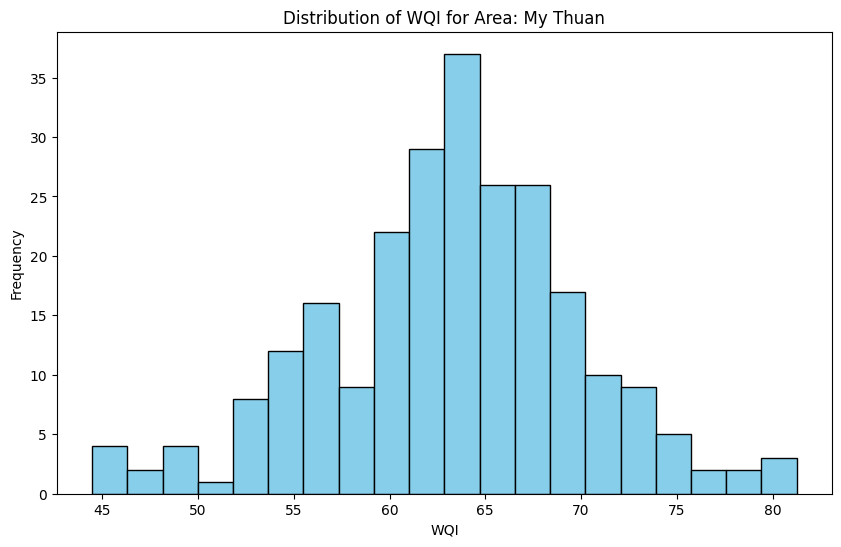

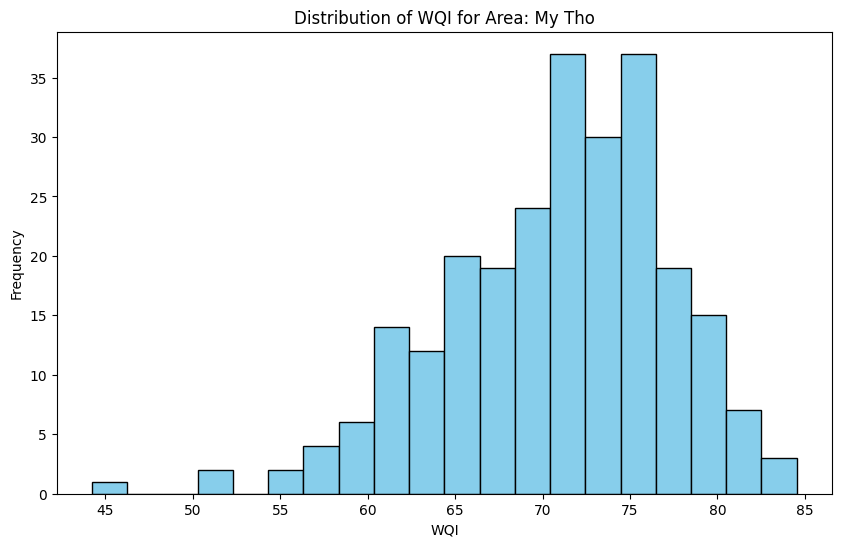

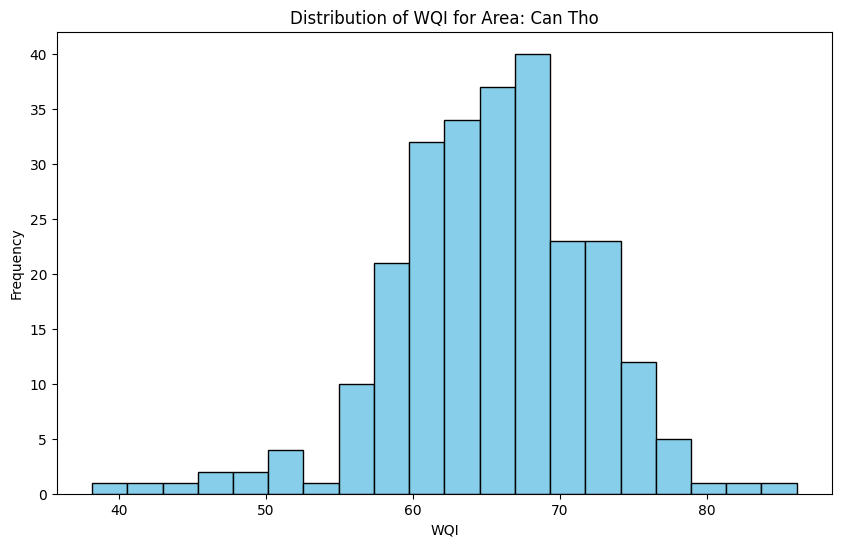

In [79]:
# Vẽ histogram cho WQI của từng khu vực
for area in areas:
    area_data = df[df['Area'] == area]

    plt.figure(figsize=(10, 6))
    plt.hist(area_data['WQI'], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of WQI for Area: {area}')
    plt.xlabel('WQI')
    plt.ylabel('Frequency')
    plt.show()


In [83]:
from statsmodels.tsa.stattools import adfuller

# Kiểm tra tính ổn định (stationarity) của WQI cho từng khu vực
for area in areas:
    area_data = df[df['Area'] == area]
    result = adfuller(area_data['WQI'].dropna())  # Loại bỏ giá trị thiếu nếu có
    print(f"ADF Statistic for {area}: {result[0]}")
    print(f"p-value for {area}: {result[1]}")

    if result[1] < 0.05:
        print(f"Chuỗi thời gian của {area} là ổn định.")
    else:
        print(f"Chuỗi thời gian của {area} không ổn định, cần thực hiện differencing.")
    print("\n")


ADF Statistic for My Thuan: -6.9233972983498795
p-value for My Thuan: 1.131301800679516e-09
Chuỗi thời gian của My Thuan là ổn định.


ADF Statistic for My Tho: -6.671875344013278
p-value for My Tho: 4.566170501332882e-09
Chuỗi thời gian của My Tho là ổn định.


ADF Statistic for Can Tho: -6.73075317720694
p-value for Can Tho: 3.300761166591948e-09
Chuỗi thời gian của Can Tho là ổn định.




## Handle missing values

In [37]:
df.isnull().sum()

,0
Area,0
Date,0
Temperature,0
PH,0
DO,0


#Check trend or seasonality

<Figure size 1400x600 with 0 Axes>

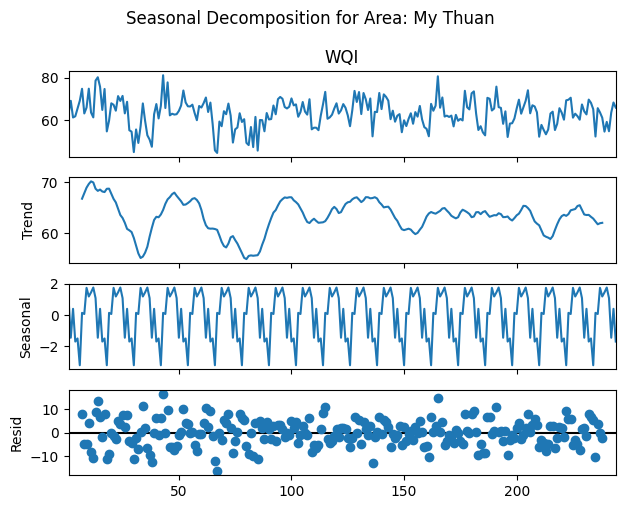

<Figure size 1400x600 with 0 Axes>

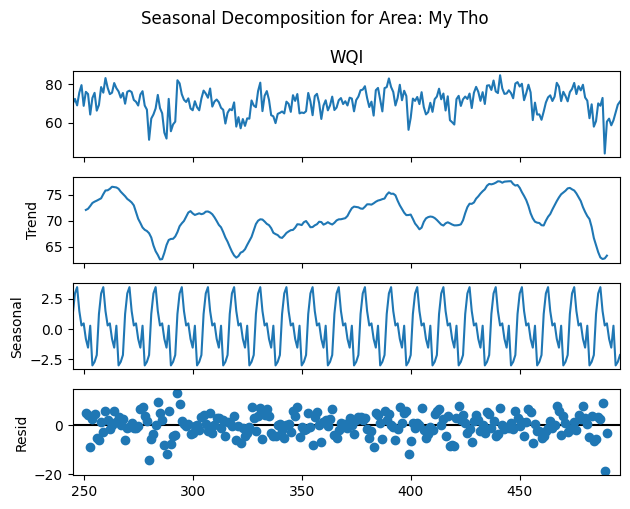

<Figure size 1400x600 with 0 Axes>

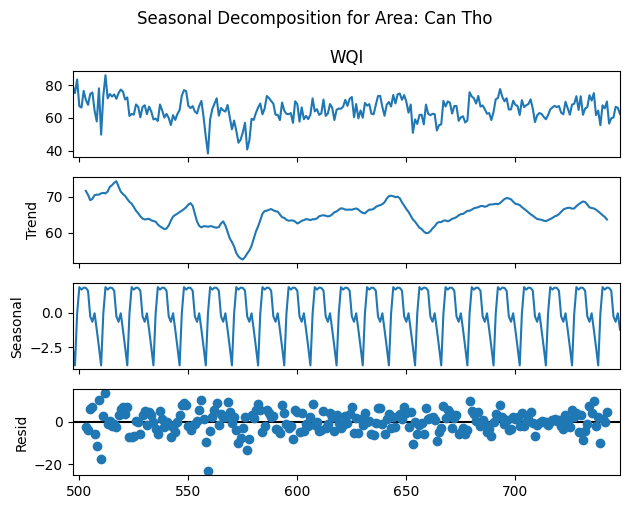

In [76]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

areas = df['Area'].unique()

for area in areas:
    area_data = df[df['Area'] == area]

    # Thực hiện phân tích mùa vụ cho cột 'PH'
    result = seasonal_decompose(area_data['WQI'], model='additive', period=12)

    # Đặt kích thước cho hình vẽ trước khi plot
    plt.figure(figsize=(14, 6))

    # Vẽ đồ thị phân tích mùa vụ
    result.plot()

    # Đặt tiêu đề cho biểu đồ
    plt.suptitle(f"Seasonal Decomposition for Area: {area}\n", y=1.05)

    # Hiển thị đồ thị
    plt.show()


<ipython-input-84-fa1a84fbb622>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['WQI_MA'] = area_data['WQI'].rolling(window=12).mean()


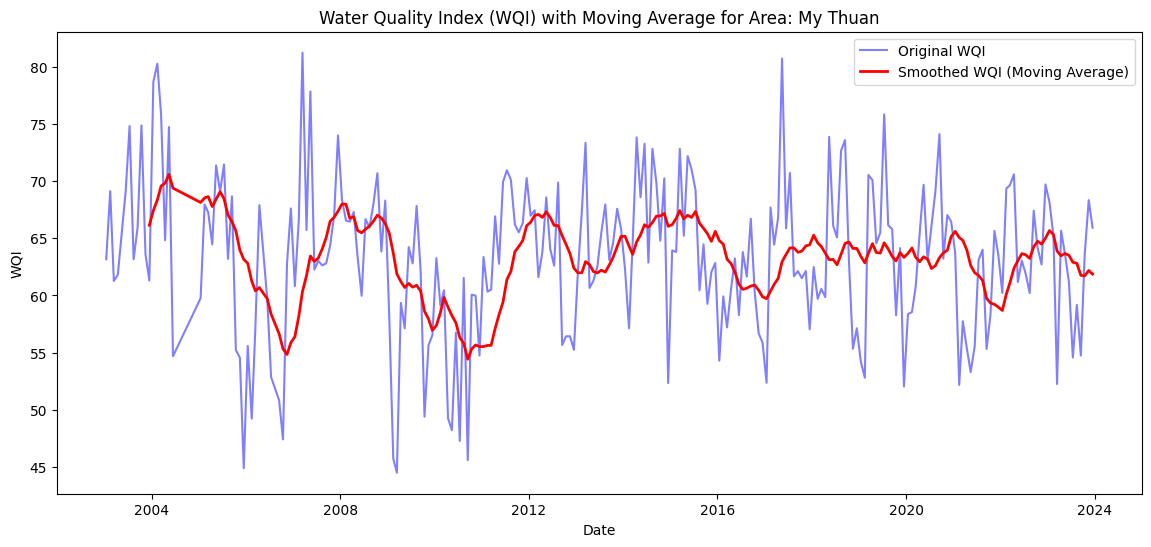

<ipython-input-84-fa1a84fbb622>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['WQI_MA'] = area_data['WQI'].rolling(window=12).mean()


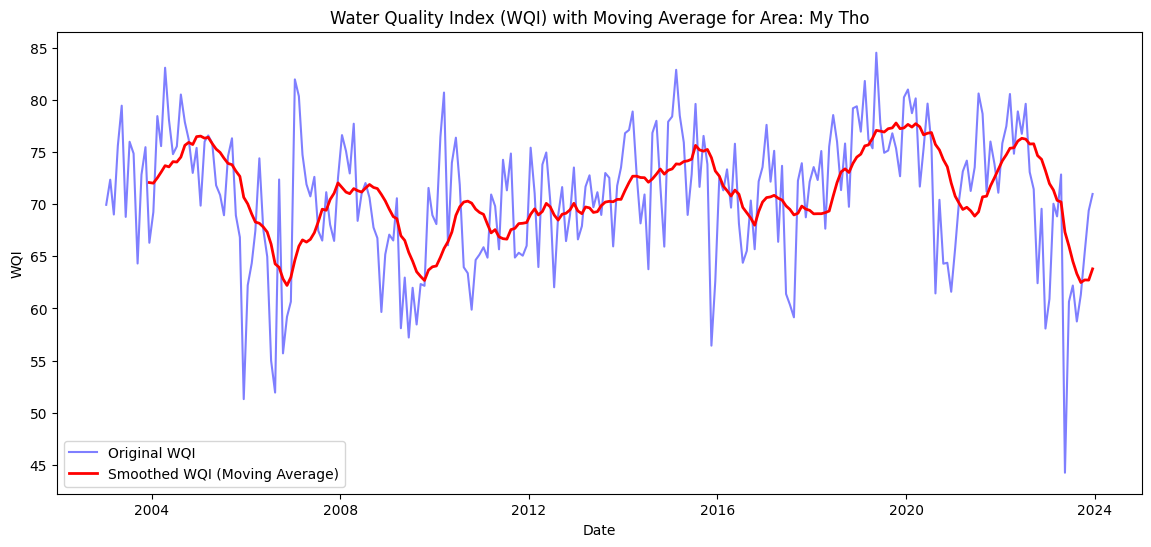

<ipython-input-84-fa1a84fbb622>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['WQI_MA'] = area_data['WQI'].rolling(window=12).mean()


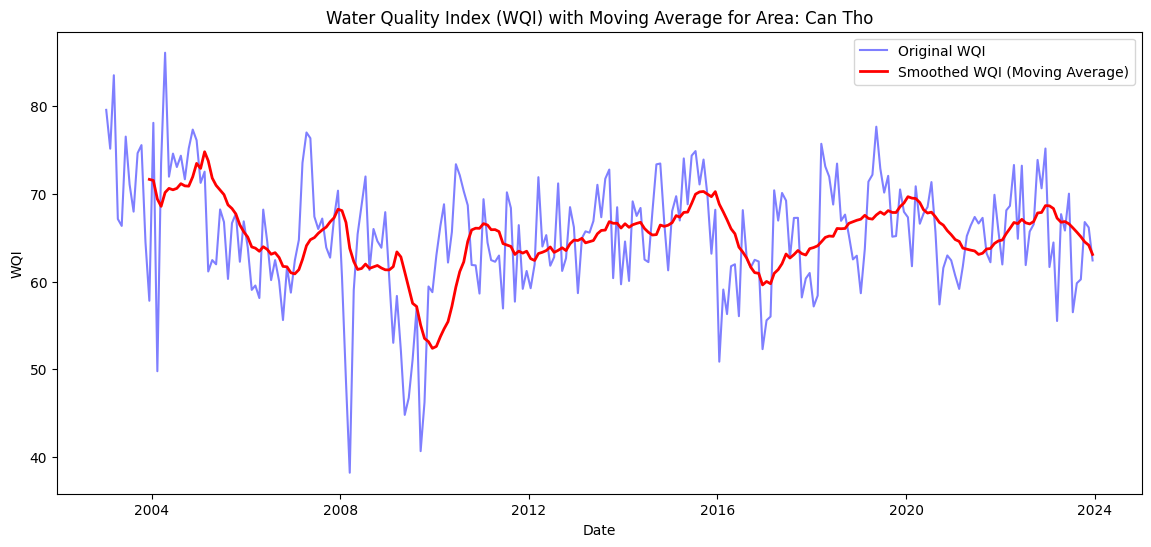

In [84]:
# Tính Moving Average (chu kỳ 12 tháng) cho từng khu vực
for area in areas:
    area_data = df[df['Area'] == area]

    # Tính Moving Average cho WQI
    area_data['WQI_MA'] = area_data['WQI'].rolling(window=12).mean()

    # Vẽ biểu đồ WQI gốc và WQI sau khi làm mượt cho từng khu vực
    plt.figure(figsize=(14, 6))
    plt.plot(area_data['Date'], area_data['WQI'], label='Original WQI', color='blue', alpha=0.5)
    plt.plot(area_data['Date'], area_data['WQI_MA'], label='Smoothed WQI (Moving Average)', color='red', linewidth=2)
    plt.xlabel('Date')
    plt.ylabel('WQI')
    plt.title(f'Water Quality Index (WQI) with Moving Average for Area: {area}')
    plt.legend()
    plt.show()


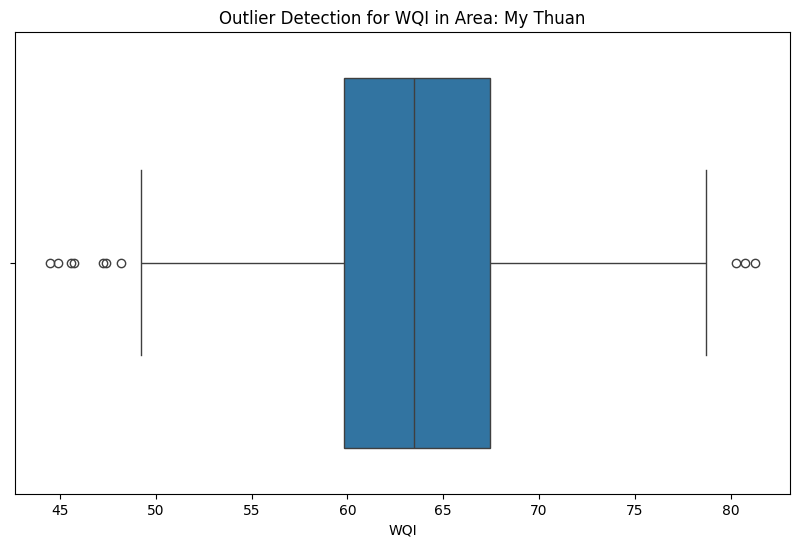

<ipython-input-85-399bb59129c1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['WQI_capped'] = area_data['WQI'].clip(lower=40, upper=90)


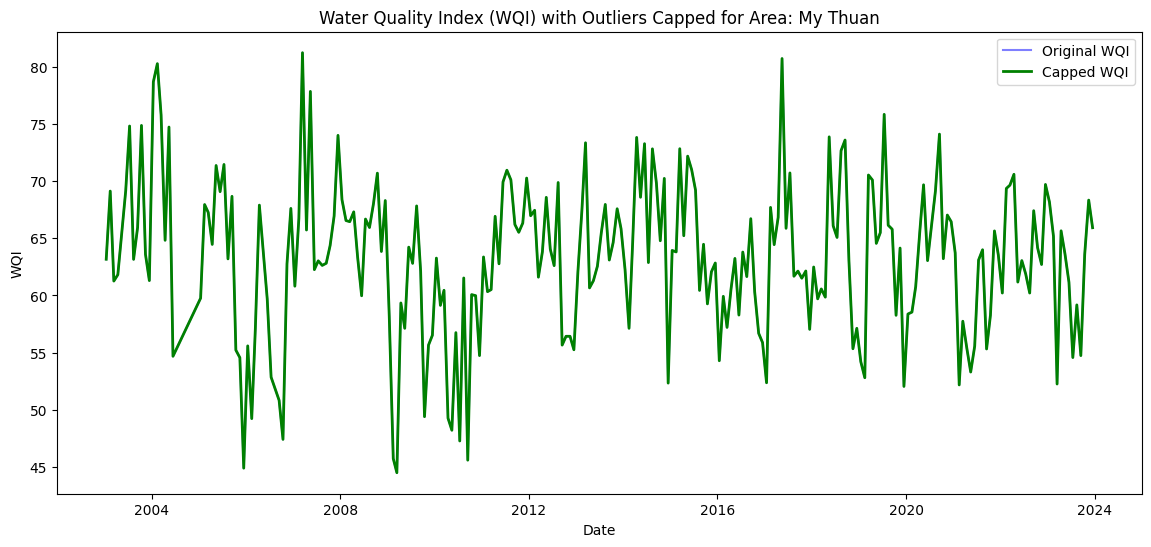

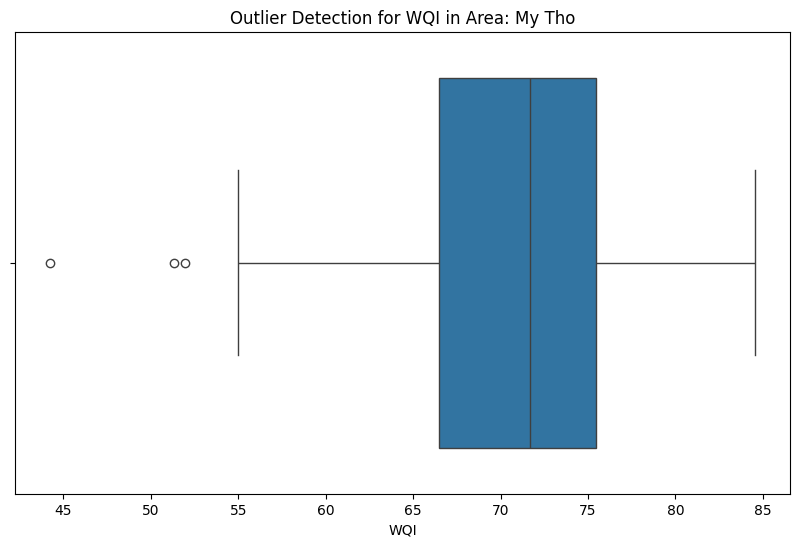

<ipython-input-85-399bb59129c1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['WQI_capped'] = area_data['WQI'].clip(lower=40, upper=90)


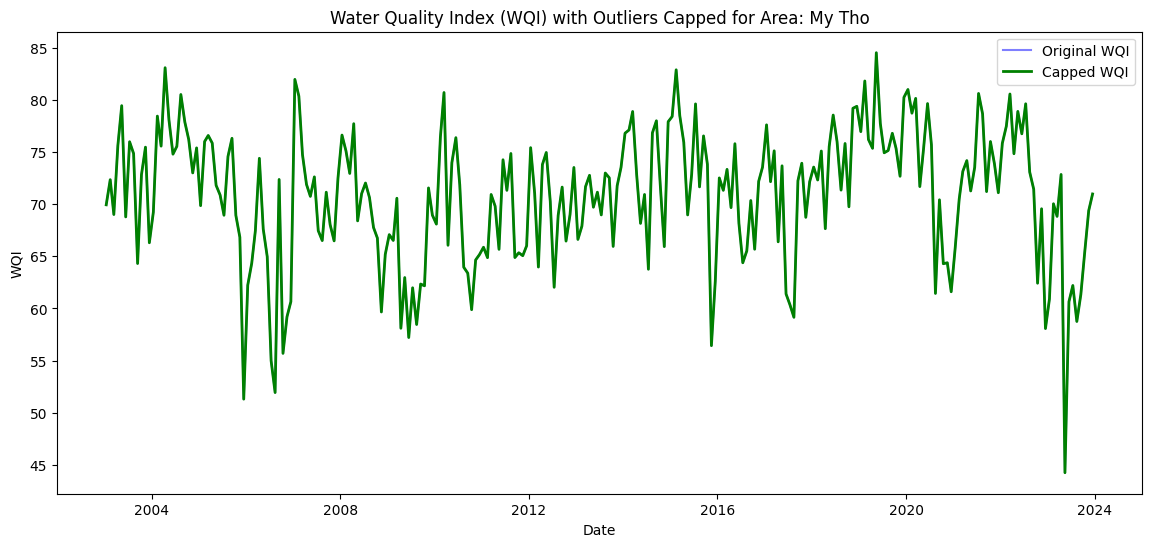

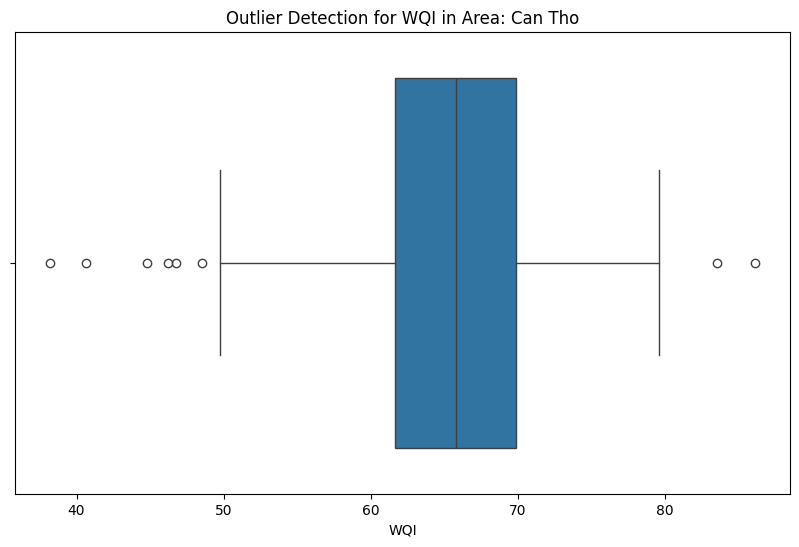

<ipython-input-85-399bb59129c1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_data['WQI_capped'] = area_data['WQI'].clip(lower=40, upper=90)


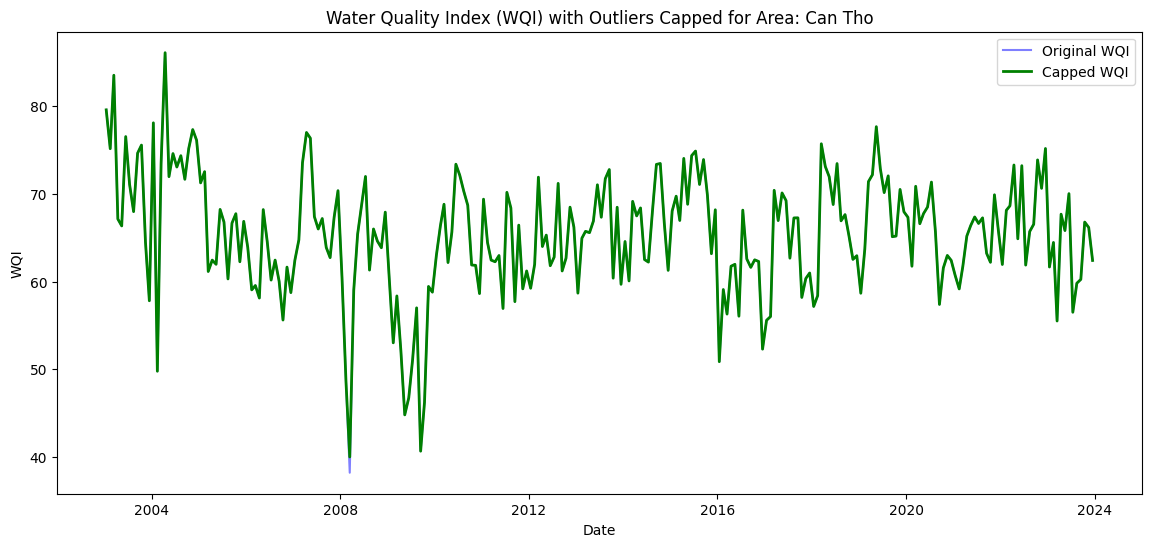

In [85]:
# Vẽ boxplot để phát hiện ngoại lai cho từng khu vực
for area in areas:
    area_data = df[df['Area'] == area]

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=area_data['WQI'])
    plt.title(f'Outlier Detection for WQI in Area: {area}')
    plt.show()

    # Capping ngoại lai: Giới hạn WQI trong phạm vi hợp lý (ví dụ: từ 40 đến 90)
    area_data['WQI_capped'] = area_data['WQI'].clip(lower=40, upper=90)

    # Vẽ lại dữ liệu sau khi capping
    plt.figure(figsize=(14, 6))
    plt.plot(area_data['Date'], area_data['WQI'], label='Original WQI', color='blue', alpha=0.5)
    plt.plot(area_data['Date'], area_data['WQI_capped'], label='Capped WQI', color='green', linewidth=2)
    plt.xlabel('Date')
    plt.ylabel('WQI')
    plt.title(f'Water Quality Index (WQI) with Outliers Capped for Area: {area}')
    plt.legend()
    plt.show()


#Check for stationarity

In [ ]:

# Function to perform Augmented Dickey-Fuller test
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)